# Powers of the golden ratio are close to integers

## Introduction

The integer higher powers of the "golden ratio", $\phi = \frac{\sqrt{5} + 1}{2}$, are surprisingly close to integers. For example,

In [3]:
import math
phi = (math.sqrt(5) + 1.) / 2.
print 'phi =', phi
print 'phi^20 =', phi ** 20

phi = 1.61803398875
phi^20 = 15126.9999339


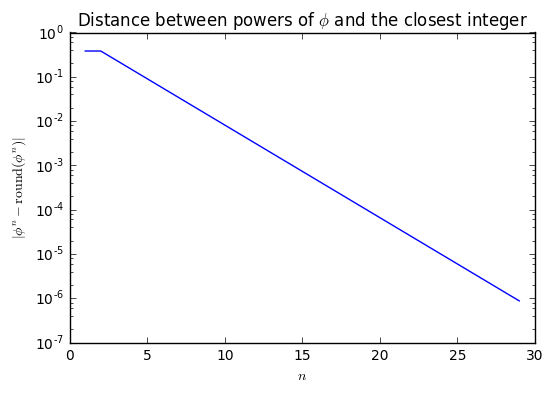

In [12]:
import matplotlib.pyplot as plt
import numpy as np
N = 30
n = np.arange(0, N)
plt.clf()
plt.semilogy(n, np.abs(phi ** n - np.round(phi ** n)))
plt.title('Distance between powers of $\phi$ and the closest integer')
plt.xlabel('$n$')
plt.ylabel('$|\phi^n - \mathrm{round}(\phi^n)|$')
plt.show()

## Proof

### Fibonacci asymptotics

It's well known that the Fibonacci sequence asymptotically approaches a constant multiplied by a power of $\phi$. More specifically,

$F_n = \frac{1}{\sqrt{5}}\phi^n -\frac{1}{\sqrt{5}} \left(-\frac{1}{\phi}\right)^{n}$.

That can be seen numerically as follows:

In [18]:
def fib(n):
    f0, f1 = 0, 1
    for i in xrange(n):
        f0, f1 = f1, f0 + f1
    return f0
for i in xrange(10):
    print fib(i),
print

0 1 1 2 3 5 8 13 21 34


In [21]:
def fib_cf(n):
    return (phi ** n - (-phi) ** (-n)) / math.sqrt(5)
for i in xrange(30):
    print abs(fib(i) - fib_cf(i)),
print

0.0 0.0 0.0 0.0 4.4408920985e-16 8.881784197e-16 1.7763568394e-15 1.7763568394e-15 3.5527136788e-15 7.1054273576e-15 1.42108547152e-14 2.84217094304e-14 5.68434188608e-14 5.68434188608e-14 1.70530256582e-13 3.41060513165e-13 4.54747350886e-13 9.09494701773e-13 1.81898940355e-12 2.72848410532e-12 4.54747350886e-12 7.27595761418e-12 1.09139364213e-11 2.18278728426e-11 3.63797880709e-11 5.82076609135e-11 8.73114913702e-11 1.7462298274e-10 2.91038304567e-10 4.65661287308e-10


### The desired recurrence

We want a recurrence involving powers of $\phi$ and integers. $\phi^{-1}$ or $-\phi^{-1}$ seem desirable as the other root, as they have a simple integer relationship that would be useful for the initial steps. If we start by using a Fibonacci style recurrence:

$\phi^0 + A (-\phi)^{-0} = B$

$\phi^1 + A (-\phi)^{-1} = C$

Simplifying:

$1 + A = B$

$\phi - A (\phi - 1) = C$

Distributing:

$1 + A = B$

$\phi(1 - A) + A = C$

If we want $B$ and $C$ to be integers, the only choice is $A = 1$ and, consequently, $B = 2$ and $C = 1$. So we have a sequence following the same recurrence as Fibonacci but starting with 2, 1, 3, 4, 7, ...

Comparing:

In [24]:
def seq(n):
    f0, f1 = 2, 1
    for i in xrange(n):
        f0, f1 = f1, f0 + f1
    return f0
for i in xrange(20):
    print seq(i),
print

2 1 3 4 7 11 18 29 47 76 123 199 322 521 843 1364 2207 3571 5778 9349


In [29]:
def seq_cf(n):
    return phi ** n + (-phi ** -1) ** n
for i in xrange(30):
    print abs(seq(i) - seq_cf(i)),
print

0.0 0.0 0.0 0.0 8.881784197e-16 1.7763568394e-15 3.5527136788e-15 7.1054273576e-15 1.42108547152e-14 2.84217094304e-14 4.26325641456e-14 5.68434188608e-14 1.70530256582e-13 2.27373675443e-13 3.41060513165e-13 6.8212102633e-13 1.36424205266e-12 2.27373675443e-12 3.63797880709e-12 5.45696821064e-12 9.09494701773e-12 1.45519152284e-11 2.91038304567e-11 5.09317032993e-11 8.73114913702e-11 1.16415321827e-10 2.32830643654e-10 4.07453626394e-10 5.82076609135e-10 1.16415321827e-09


Then it is easy to see that the sequence will be integer and, consequently, $\phi^n$ will only differ from an integer by the exponentially decreasing term $(\phi^{-1})^n$.